# **Post Pruning and Pre Pruning - Practical Implementation**

In [16]:
# importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading dataset
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Label Encoding**

In [4]:
iris_df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
iris_df['species'] = iris_df['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

**Train Test Split**

In [6]:
# importing train_test_split
from sklearn.model_selection import train_test_split

In [28]:
# splitting
X = iris_df.drop('species', axis=1)
y = iris_df[['species']]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## **Post Pruning**

Perform post pruning when dataset is small.

In [9]:
# importing DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

**Training**

In [30]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.5416666666666666, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.625, 0.7857142857142857, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4166666666666667, 0.6428571428571429, 'x[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.3333333333333333, 0.5, 'x[3] <= 1.65\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[2] <= 4.95\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.25, 0.21428571428571427, 'x[1] <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.16666666666666666, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3333333333333333, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0

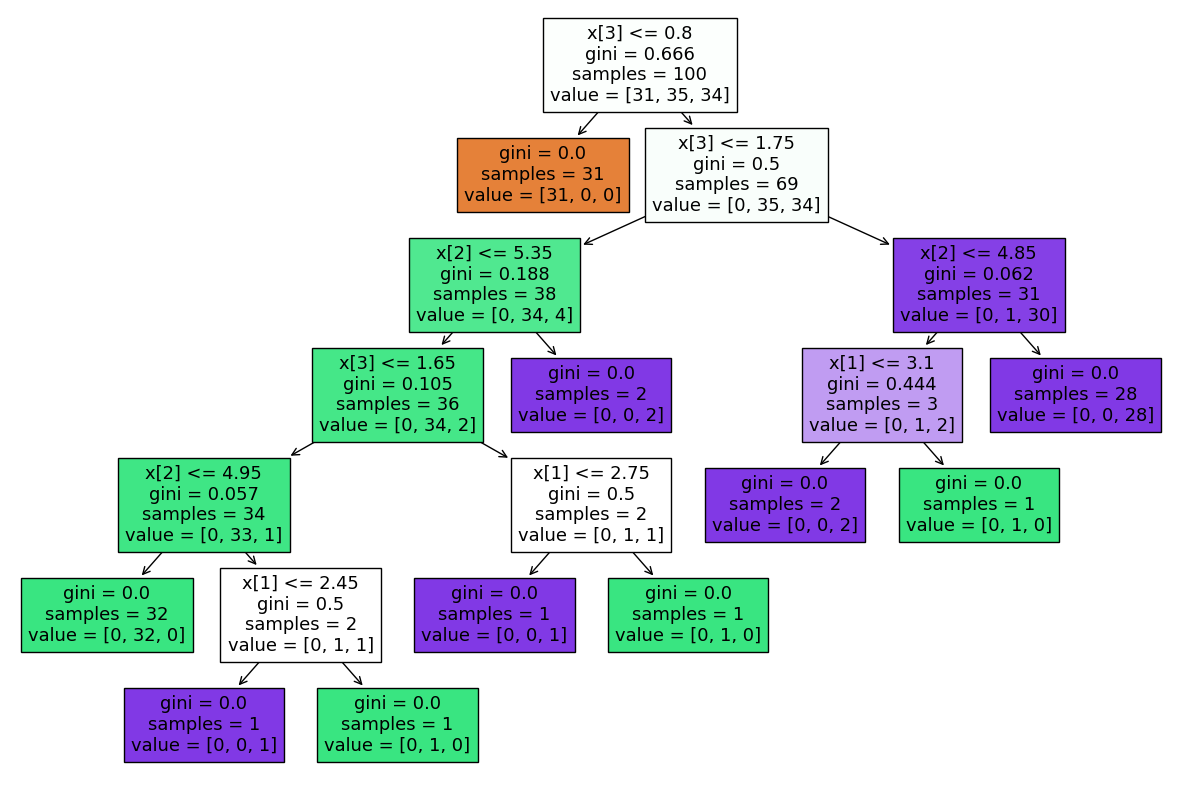

In [31]:
# contructing tree
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(decision_tree, filled=True)

**At level 2, the classes propoertion are too uneven. So we can remove sub nodes after level 2.**

In [32]:
decision_tree_post_pruned = DecisionTreeClassifier(max_depth=2)
decision_tree_post_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.062\nsamples = 31\nvalue = [0, 1, 30]')]

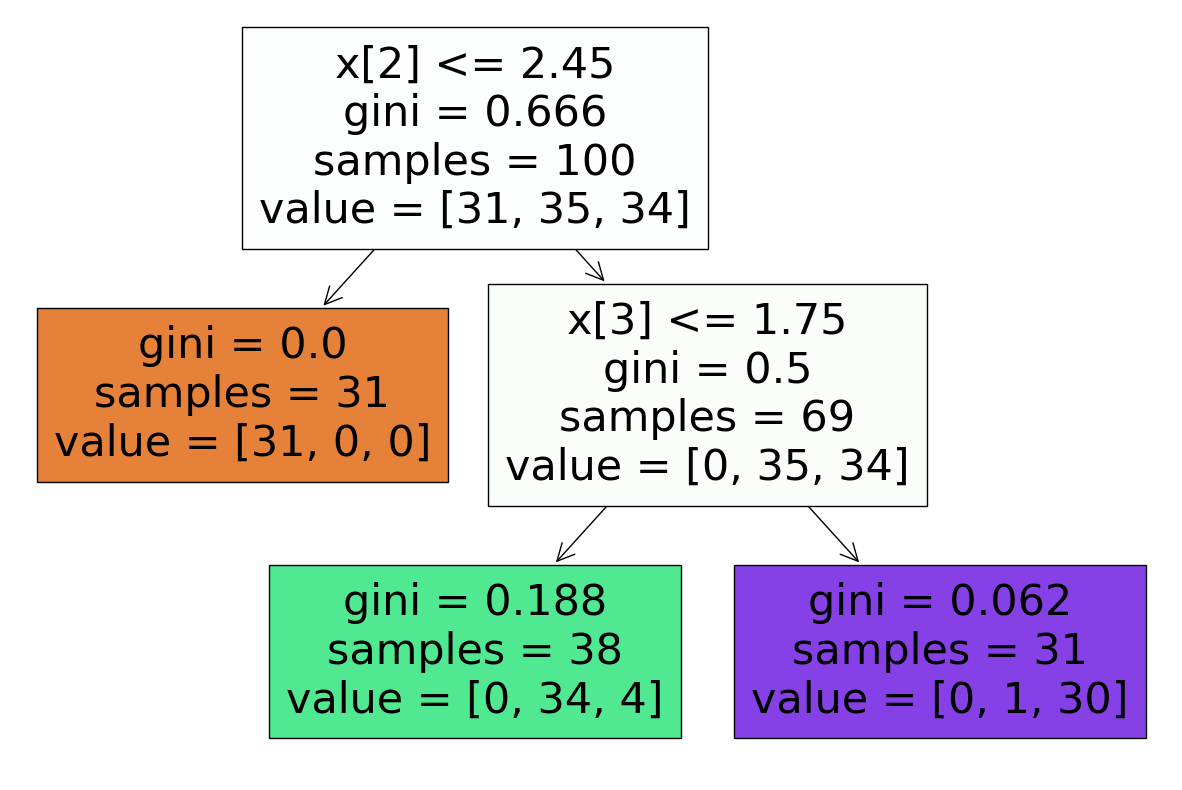

In [33]:
plt.figure(figsize=(15, 10))
tree.plot_tree(decision_tree_post_pruned, filled=True)

**Testing**

In [23]:
# importing metrics
from sklearn.metrics import accuracy_score, classification_report

In [34]:
decision_tree_post_pruned_pred = decision_tree_post_pruned.predict(X_test)

In [35]:
# accuracy score
accuracy_score(decision_tree_post_pruned_pred, y_test)

0.98

In [36]:
# classification report
print(classification_report(decision_tree_post_pruned_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## **Pre Pruning**

Perform pre pruning when dataset is large.

In [37]:
# importing DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# importing GridSearchCV
from sklearn.model_selection import GridSearchCV

**Training**

In [39]:
decision_tree = DecisionTreeClassifier()

In [44]:
parameters = {
    'criterion': ['gini', 'entropy', 'logg_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2'],
}
decision_tree_cv = GridSearchCV(decision_tree, param_grid=parameters, scoring='accuracy', cv=5)
decision_tree_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'logg_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [45]:
# best params
decision_tree_cv.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'random'}

In [46]:
# best score
decision_tree_cv.best_score_

0.96

**Testing**

In [47]:
# importing metrics
from sklearn.metrics import accuracy_score, classification_report

In [49]:
y_pred = decision_tree_cv.predict(X_test)

In [50]:
# accuracy_score
accuracy_score(y_pred, y_test)

0.94

In [51]:
# classification report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.93      0.88      0.90        16
           2       0.94      1.00      0.97        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50

